# Analysis of Extracted Data

### Importing the CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tweet_df=pd.read_csv('twitter_data.csv')

In [3]:
tweet_df.head()

,Unnamed: 0,UserID,Name,Tweet,Mentions,Created At,Retweet,Likes,Location
0,0,5125_uttam,UTTAM SALUNKE,@VanchitRuttank: #HarGharTiranga \nहा राष्ट्री...,"['वंचित वृत्तांक अधिकृत', 'Prakash Ambedkar']",2022-09-02 19:00:51+00:00,1,0,NaN
1,1,Sangeeta_IND92,Sangeeta Tiwari,@AbhishektiBJP: #HarGharTiranga ....तिरंगा हमा...,['Abhishek Tiwari'],2022-09-02 18:57:07+00:00,1,0,NaN
2,2,profpicturebot,Bot,"@AbhishektiBJP: #NewProfilePic\n""तिरंगा हमें ज...",['Abhishek Tiwari'],2022-09-02 18:57:04+00:00,1,0,location
3,3,Sangeeta_IND92,Sangeeta Tiwari,"@AbhishektiBJP: #NewProfilePic\n""तिरंगा हमें ज...",['Abhishek Tiwari'],2022-09-02 18:57:01+00:00,1,0,NaN
4,4,Sangeeta_IND92,Sangeeta Tiwari,@AbhishektiBJP: भारत के राष्ट्रीय ध्वज के रचना...,['Abhishek Tiwari'],2022-09-02 18:56:50+00:00,1,0,NaN


In [4]:
tweet_df.shape

(35947, 9)

In [133]:
max(tweet_df["Likes"].values)

4945

In [5]:
tweet_df["UserID"].value_counts()

BaramullaNyk       1535
YuvaGurdaspur      1215
NYKAnantnag         886
Andhravilasnews     752
nyk_budgam          550
                   ... 
sandeep30766558       1
Aaaaaaa48043398       1
onlyiffat             1
rpfpchgyd             1
BharatPhonde5         1
Name: UserID, Length: 12253, dtype: int64

In [6]:
top_mentions=tweet_df["Mentions"].value_counts()[:10]
top_mentions

['Narendra Modi']                     2609
['NYKS India']                        1932
[]                                    1672
['Dera Sacha Sauda']                   901
['Amrit Mahotsav']                     814
['Pawan Kalyan', 'Amrit Mahotsav']     489
['SMG Haryana']                        448
['Mahesh Babu']                        432
['Bhāratvarṣam']                       399
['Blue Chip']                          365
Name: Mentions, dtype: int64

In [7]:
tweet_df["Retweet"].value_counts()

1    33680
0     2267
Name: Retweet, dtype: int64

In [8]:
topUsers=tweet_df["UserID"].value_counts()[:10]
topUsers

BaramullaNyk       1535
YuvaGurdaspur      1215
NYKAnantnag         886
Andhravilasnews     752
nyk_budgam          550
RahulVerma1971      504
nyks_doda           488
therkmalviya        473
nykkinnaur          399
JammuNehru          363
Name: UserID, dtype: int64

### Visualizing Data

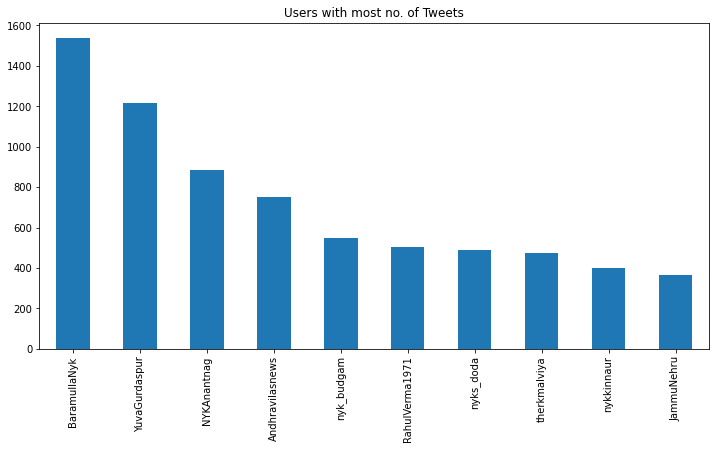

In [9]:
plt.figure(figsize=(12,6))
topUsers.plot.bar();
plt.title("Users with most no. of Tweets")
plt.show()

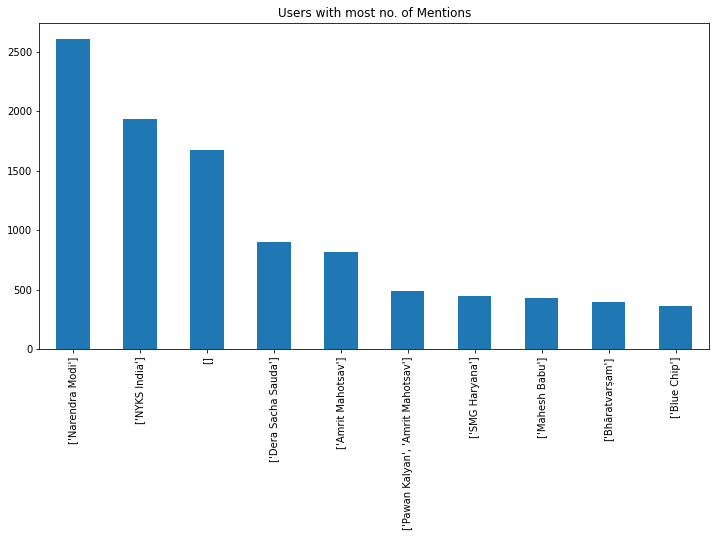

In [10]:
plt.figure(figsize=(12,6))
top_mentions.plot.bar();
plt.title("Users with most no. of Mentions")
plt.show()

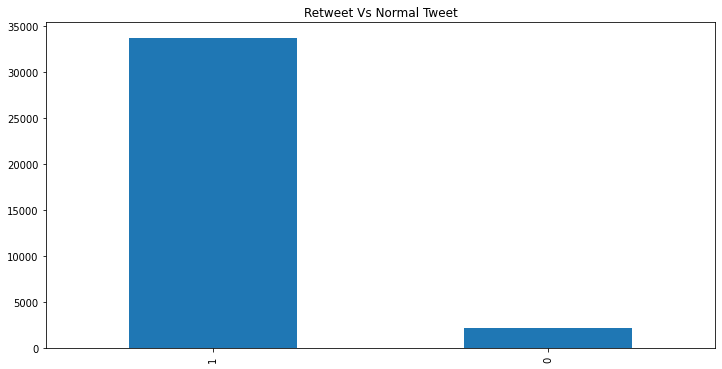

In [11]:
rtVsT=tweet_df["Retweet"].value_counts()
plt.figure(figsize=(12,6))
rtVsT.plot.bar();
plt.title("Retweet Vs Normal Tweet")
plt.show()

### Using NetworkX

In [12]:
import networkx as nx

In [13]:
G = nx.Graph()

In [14]:
NODES=list(set(tweet_df["UserID"]))
len(NODES)

12253

In [15]:
G.add_nodes_from(NODES)

In [16]:
tweet_df.iloc[0]["Mentions"][1:-1].split(',')[0][1:-1]

'वंचित वृत्तांक अधिकृत'

In [17]:
EDGES=[]

for i in range(tweet_df.shape[0]):
    temp_edges=[]
    tweeted_user=tweet_df.iloc[i]["UserID"]
    mentions=tweet_df.iloc[i]["Mentions"][1:-1].split(',')
    for m in mentions:
        temp_edges.append((tweeted_user,m[1:-1]))
    EDGES.extend(temp_edges)

In [18]:
G.add_edges_from(EDGES)

In [19]:
len(G.edges)

25550

## Metrics

### Closeness Centrality

In [20]:
closeness_centrality=nx.closeness_centrality(G)

In [21]:
sorted_cc = sorted(closeness_centrality.items(), key = lambda kv: kv[1],reverse=True)

In [22]:
sorted_cc[:10]

[('Narendra Modi', 0.24997409813787205),
 ('RahulVerma1971', 0.24691931307635356),
 ('nyk_budgam', 0.23435469564049696),
 ("'Narendra Modi", 0.22440592059834333),
 ('nyks_doda', 0.22155725712828334),
 ('YuvaSbs', 0.21981089349643382),
 ('therkmalviya', 0.2171095757343814),
 ('Nykuttarkashi', 0.2153178006166518),
 ('rdnss_kolkata', 0.21529948271281776),
 ("'Amrit Mahotsav", 0.21434215038094492)]

### Number of nodes and edges

In [23]:
nodes_list=G.nodes
len(nodes_list)

16742

In [24]:
edges_list=G.edges
len(edges_list)

25550

### Degree

In [134]:
degree=sorted(nx.degree(G),key=lambda x:x[1],reverse=True)
degree[0:10]

[('Narendra Modi', 1870),
 ("'Narendra Modi", 492),
 ('', 454),
 ('SMG Haryana', 404),
 ('Bhāratvarṣam', 398),
 ("'Amrit Mahotsav", 385),
 ('Pawan Kalyan', 353),
 ("'Jay Shah", 316),
 ('Mahesh Babu', 315),
 ('Amrit Mahotsav', 308)]

### Betweeness Centrality

In [ ]:
betweeness_centrality=sorted(nx.betweenness_centrality(G, normalized=True).items(), key=lambda x:x[1], reverse=True)
betweeness_centrality[0:10]

## Visualizing

C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Wall time: 15min 14s


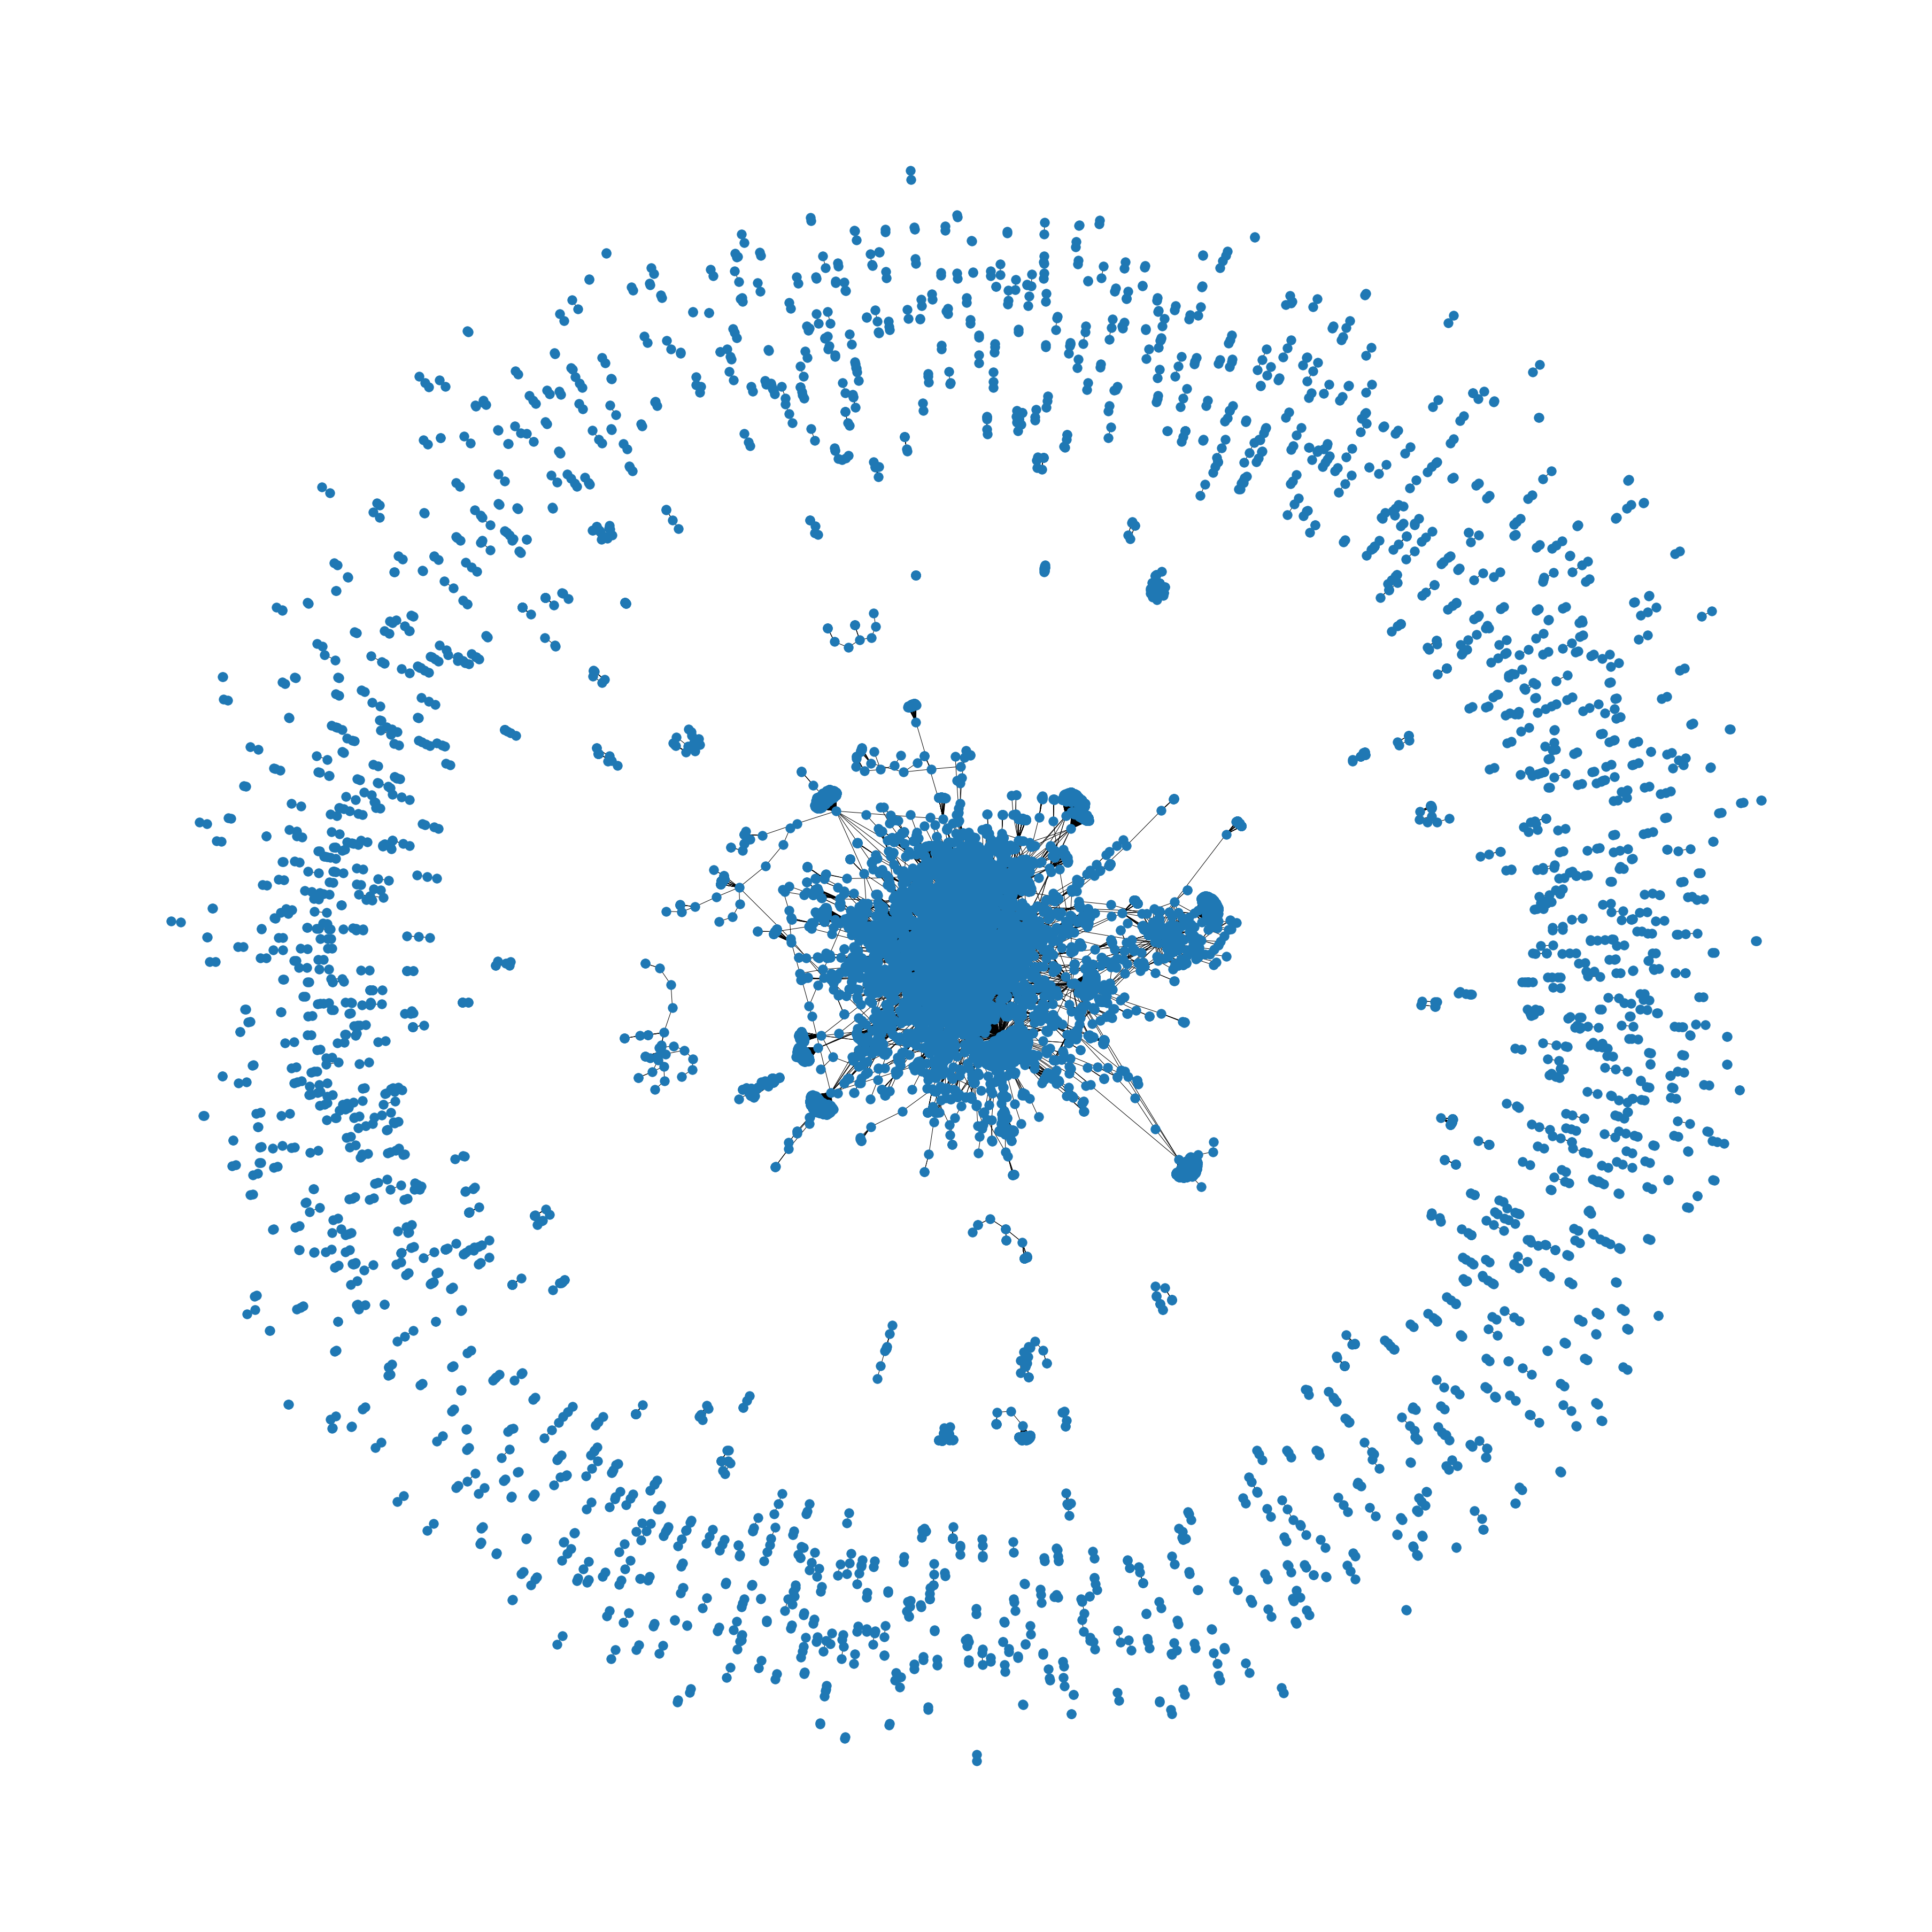

In [27]:
%%time
plt.figure(figsize=(50,50))
nx.draw(G)
plt.savefig("Twitter_NW_small.png")

In [28]:
nx.write_graphml_lxml(G,"twitter_hgt.graphml")

In [29]:
nx.write_gml(G, "test.gml")

### Degree Assortativity

In [30]:
deg_assortativity=nx.degree_assortativity_coefficient(G)

In [31]:
deg_assortativity

-0.12115644345814595

### Density

In [32]:
density=nx.density(G)
density

0.00018231909908305197

### Center

In [33]:
center=nx.center(G)

NetworkXError: Found infinite path length because the graph is not connected

### Diameter

In [34]:
diameter=nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected

### Eccentricity

In [35]:
ecc=nx.eccentricity(G)
ecc

NetworkXError: Found infinite path length because the graph is not connected

### Maximum Independent Set

In [36]:
max_clique=nx.max_clique(G)
max_clique

AttributeError: module networkx has no attribute max_clique

### Katz centrality

In [ ]:
katz_centrality=sorted(nx.katz_centrality_numpy(G).items(),key=lambda x:x[1], reverse=True)
katz_centrality[0:10]

### Eigen Vector centrality

In [ ]:
e_vec_centrality=sorted(nx.eigenvector_centrality_numpy(G).items(),key=lambda x:x[1], reverse=True)
e_vec_centrality[0:10]

### Page Rank

In [ ]:
pg_rank=sorted(nx.pagerank(G).items(),key=lambda x:x[1], reverse=True)
pg_rank[0:10]

### Wordcloud

In [40]:
from wordcloud import WordCloud

In [41]:
text = " ".join(tweet.split()[1] for tweet in tweet_df.Tweet)

In [68]:
import re
regex = re.compile('[^\sa-zA-Z0-9]')

In [70]:
new_text=regex.sub('', text)
print(len(new_text))
new_text

235154


'HarGharTiranga HarGharTiranga NewProfilePic NewProfilePic     NMAppVrtualMeet    As  Participated  SSPJhansi  Our One  As Celebrating Celebrating Celebrating Celebrating Celebrating HarGharTiranga Celebrating HarGharTiranga Wishing Tricolour  Azadi     During  On I In Our  One The ED As     This An Wonderful please Overjoyed Makes Spectacular I Thats Majestic An Excellent Devbhoomi Outstanding Indeed The Our  This This The The Toured I Gujarats Jai Azadi Indias India Remarkable Breathtaking Great Great Happy Proud Such  Under  Celebrating One     One As Our One As  One   Tiranga     As As AmritMahotsav  The HarGharTiranga As In I As Happy ED It It Our HarGharTiranga The Leaving Azadi Salute NewProfilePic HarGharTiranga Har Har Prabhat Prabhat Prabhat Har My Har Bhangra HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTiranga HarGharTi

In [63]:
len(text)

286959

In [114]:
text_arr=new_text.split(' ')
print(len(text_arr))
for i,text in enumerate(text_arr):
    if len(text)<1:
        text_arr.pop(i)
print(len(text_arr))
unique, counts = np.unique(text_arr, return_counts=True)

updated_text=" ".join(text_arr)

35947
29907


In [115]:
word_count_df=pd.DataFrame({
    'word':unique,
    'count':[int(count) for count in counts]
})
word_count_df.sort_values('count')

,word,count
1049,Prime,1
1602,dance,1
813,Management,1
1603,data,1
811,Mamma,1
...,...,...
554,Har,770
961,Our,1084
164,Azadi,1871
0,,2252


In [123]:
word_cloud = WordCloud(width=1400, height=800,collocations = False, background_color = 'white').generate(updated_text)

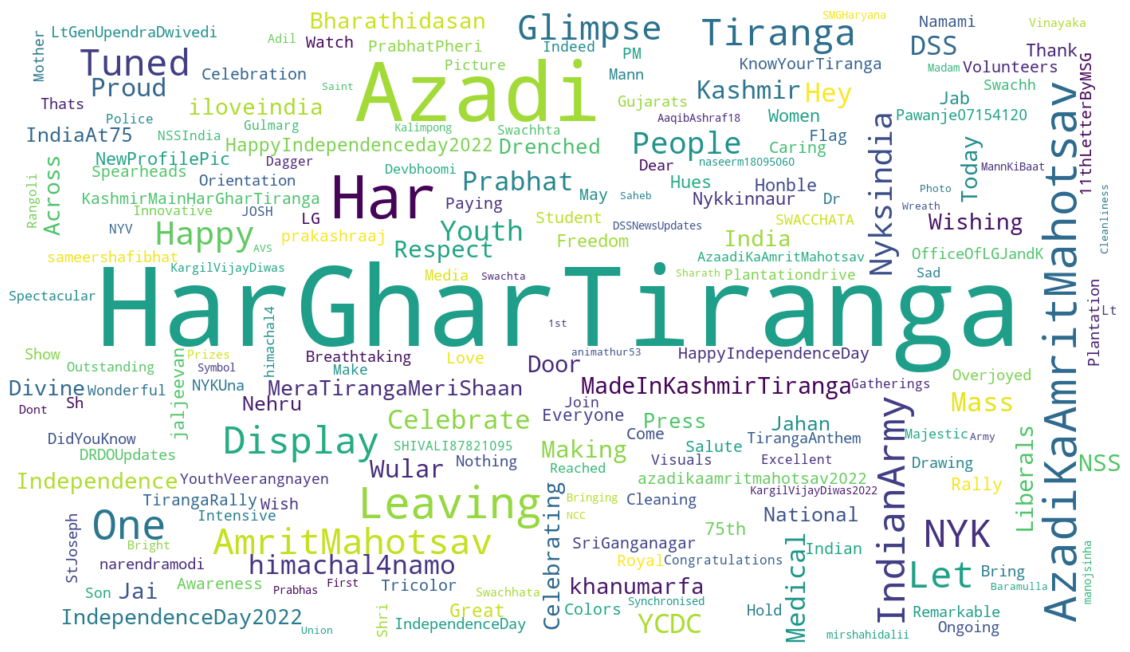

In [126]:
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("word_cloud.png")
plt.show()